In [2]:
#Install PRAW
!pip install praw
import praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 1.9 MB/s eta 0:00:00


In [54]:
# Log In to App:
reddit = praw.Reddit(client_id='1iuOuL04nTxEzo8JsJlhyA', client_secret='2X74M2KWRvwqbCqUXu_G2s_JZ7fzCQ', user_agent='datascience')

In [55]:
#Open the subreddit discussion with the salaries
url = "https://www.reddit.com/r/datascience/comments/18tevwk/official_2023_end_of_year_salary_sharing_thread/"
submission = reddit.submission(url=url)

**Scraping reddit comments**

In [56]:
from praw.models import MoreComments

comments = []

for top_level_comment in submission.comments:
    print(top_level_comment.body)
    comments.append(top_level_comment.body)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Can't we use a form or something so that we don't have to go through the commnets 1 by 1 lmao
Title: Senior Data Scientist 

Tenure length: 1 year

Location: Canada (Remote)

Salary: 175k

Company/Industry: Small Fintech Company

Education: BS Economics & Mathematics 

Prior Experience: 5 years DS, 8 years Quant Risk/Consulting/Banking

Other Bonuses: Equity

Total Comp: 175k
Title: Data Scientist I

Tenure: N/A (start in summer)

Salary: $100k

Location: HCOL East Coast

Industry: Banking/Finance

Education: B.S. in Stats, minor in Math from top U.S. public university 

Experience: 2 prior internships.

Relocation/Signing Bonus: $10k

Stock/Recurring Bonus: $10k

TC: $110k
Data scientist
  
1/2 year of tenure
  
190k salary
  
Remote, US
  
Small tech company
  
Masters in data science
  
2 years of prior experience as a data scientist.
  
No signing bonus
  
No other bonus to date
  
Total comp 190k
These salary ranges and TC packages are all over the board.
* **Title:** Sr. Staff Re

In [57]:
#We can see it has a lot of whitespaces and newlines
comments[1]

'Title: Senior Data Scientist \n\nTenure length: 1 year\n\nLocation: Canada (Remote)\n\nSalary: 175k\n\nCompany/Industry: Small Fintech Company\n\nEducation: BS Economics & Mathematics \n\nPrior Experience: 5 years DS, 8 years Quant Risk/Consulting/Banking\n\nOther Bonuses: Equity\n\nTotal Comp: 175k'

**Create Randomized Testing function**
(Picks up a comment from random for analysis)

In [58]:
import random

def testComment(commentsData):
  randomComment = random.choice(commentsData)
  print(randomComment)

In [59]:
#Print random comment
testComment(comments)

Title: Data Scientist-Business Intelligence Engineer

Tenure length: 0.5 Years

Location: US (Remote)

Salary: $90,000

Company/Industry: Tax and Accounting Tech

Education: BA Math and Music

Prior Experience: Data Scientist at a startup, 1 Year; Implementation Consultant, 1 Year (same company)

Relocation/Signing Bonus: n/a

Stock and/or recurring bonuses: n/a

Total comp: $90,000


**Removing Bad Data**(comments which don't fit the salary template)

In [60]:
#Delete comments which don't have title in them
import re
#Check how many comments having salary information are present
print(len(comments))

cleaned = []

for i in comments:
  if re.search('Title|title',i):
    cleaned.append(i)
  else:
    print("Deleted:",i)

print(len(cleaned))

148
Deleted: Can't we use a form or something so that we don't have to go through the commnets 1 by 1 lmao
Deleted: Data scientist
  
1/2 year of tenure
  
190k salary
  
Remote, US
  
Small tech company
  
Masters in data science
  
2 years of prior experience as a data scientist.
  
No signing bonus
  
No other bonus to date
  
Total comp 190k
Deleted: These salary ranges and TC packages are all over the board.
Deleted: Gonna add some "non - US" data:

Tenure length: 2 years

Location: India

Salary: $19,000

Industry: a US based financial services company.

Education: bachelors in CS

Prior exp: 4 months research exp at a top lab, 6 months internship at a top consulting company, 4 months full time at the same consulting company. Then 2 years as a data scientist in my current company. 

Bonus: $500

Stock: nope

Total comp: $19,500


Now I see what my colleagues mean by cost cutting. All of this is pre taxes btw.
Deleted: MLE (2)

2.5 yrs

Remote USA

~150k

HR Tech

BS Math

5 year 

**Remove special characters**

In [61]:
cleaned2 = []
for i in cleaned:
  cleaned2.append(re.sub('\*|\$|~|%|<|>|-|€|\•','',i))

for i in cleaned2:
  print(i)

len(cleaned2)

Title: Senior Data Scientist 

Tenure length: 1 year

Location: Canada (Remote)

Salary: 175k

Company/Industry: Small Fintech Company

Education: BS Economics & Mathematics 

Prior Experience: 5 years DS, 8 years Quant Risk/Consulting/Banking

Other Bonuses: Equity

Total Comp: 175k
Title: Data Scientist I

Tenure: N/A (start in summer)

Salary: 100k

Location: HCOL East Coast

Industry: Banking/Finance

Education: B.S. in Stats, minor in Math from top U.S. public university 

Experience: 2 prior internships.

Relocation/Signing Bonus: 10k

Stock/Recurring Bonus: 10k

TC: 110k
 Title: Sr. Staff Research Scientist
 Tenure length: 3.5 years
 Location: fully remote, based in NYC
 Salary: 265k. I also teach two classes a year in the city for another 27k. 
 Company/Industry: Public company with an R&D focus.
 Education: M.S. in Statistics, Ph.D in Economics
 Prior Experience: 1 year postdoc, 1.5 years assistant professor at a business school, some tech internships back in grad school 
 Rel

116

In [62]:
#Print random comment
testComment(comments)

#We can see there's still empty lines remaining

For those in EU, I made an (unofficial) post for reference last year. Those US/CAD numbers are hardly comparable.

Link: https://www.reddit.com/r/datascience/comments/w166vu/europe_data_scientists_how_are_careers_in_your/


**Get rid of empty lines**

In [91]:
import os
cleaned3 = []
for j in cleaned2:
  tmp = []
  for i in j.split('\n'):
    i = i.lstrip()
    i = os.linesep.join([s for s in i.splitlines() if s])

    #This next section makes sure we aren't appending any
    # lines that are white space back to our list nested
    # comment list

    if re.match(r'^\s*$', i):
      pass
    else:

      # The below also gets rid of tabbed space and unicode junk
      tmp.append(re.sub('\t|\u2060','',i))
  cleaned3.append(tmp)


In [64]:
testComment(cleaned3)

['Title: staff research scientsit/engineer', 'YoE: 5', 'Tenure length: 6 months', 'Location: Canada, Remote', 'Salary: 200k', 'Company/Industry: research lab at big tech co', 'Education: msc stats', 'Prior Experience: mle/research engineer  nlp and later (and now) llms', 'Stock and/or recurring bonuses: 15 bonus, 240k rsus 4 yr vest', 'Total comp: 290k']


**Make Lowercase, Remove Commas, Remove k and K, ie, 97k = 97000, Remove trailing white space**

In [92]:
cleaned4 = []
for eachComment in cleaned3:
  comment = []
  for i in eachComment:
      if re.match('Title', i):
        i = i.lower()
        comment.append(i.rstrip())
      elif re.match('[S-s]alary', i):
        i = i.lower()
        # Remove commas
        i = i.replace(',', '')
        i = i.replace('.', '')
        # Replace [K-k] with 000
        i = i.replace('K', '000')
        i = i.replace('k', '000')
        comment.append(i.rstrip())
      elif re.match('[L-l]ocation', i):
        i = i.lower()
        comment.append(i.rstrip())
      elif re.match('[P-p]rior [E-e]xperience', i):
        i = i.lower()
        comment.append(i.rstrip())
  cleaned4.append(comment)

len(cleaned4)

116

In [93]:
cleaned4

[['title: senior data scientist',
  'location: canada (remote)',
  'salary: 175000',
  'prior experience: 5 years ds, 8 years quant risk/consulting/banking'],
 ['title: data scientist i', 'salary: 100000', 'location: hcol east coast'],
 ['title: sr. staff research scientist',
  'location: fully remote, based in nyc',
  'salary: 265000 i also teach two classes a year in the city for another 27000',
  'prior experience: 1 year postdoc, 1.5 years assistant professor at a business school, some tech internships back in grad school'],
 ['title: senior scientist: statistics',
  'location: ne usa',
  'salary: 135000 base',
  'prior experience: 11 years'],
 ['title: senior staff ml engineer',
  'location: sf bay area',
  'salary: 300000',
  'prior experience:  4yrs industry, 5 yrs postdoc'],
 ['title: staff data scientist / tech lead manager',
  'location: seattle/hybrid',
  'salary: 214000',
  'prior experience:  military vet, statistics professor, federal r&d, 2 start ups (20yrs total work hi

**Delete observations with missing elements**

In [94]:
for i in cleaned4:
  if len(i) < 4:
    print("Deleted:", i)
    cleaned4.remove(i)

Deleted: ['title: data scientist i', 'salary: 100000', 'location: hcol east coast']
Deleted: ['title: economist', 'location: seattle', 'salary:165000']
Deleted: ['title: senior data scientist', 'location: usa (remote, i am based in the midwest)', 'prior experience: 5 years da']
Deleted: ['title: director of data science (l8)', 'location: hcol', 'salary: 300000']
Deleted: ['location: ann arbor, mi', 'salary: 74000']
Deleted: ['title:  data scientist', 'location:  remote company, midwest hq']
Deleted: []
Deleted: ['title: data analyst', 'location: remote', 'salary: 130000']
Deleted: []
Deleted: ['title: senior data scientist', 'location: ny, us']
Deleted: ['title: analytics engineer / data engineer', 'location: singapore', 'salary: 80000']
Deleted: ['title: data scientist', 'location: boise (remote)', 'salary: 135000']
Deleted: ['title: epic bi developer', 'salary: 91000', 'location: north georgia']


In [116]:
cleaned4

[['title: senior data scientist',
  'location: canada (remote)',
  'salary: 175000',
  'prior experience: 5 years ds, 8 years quant risk/consulting/banking'],
 ['title: sr. staff research scientist',
  'location: fully remote, based in nyc',
  'salary: 265000 i also teach two classes a year in the city for another 27000',
  'prior experience: 1 year postdoc, 1.5 years assistant professor at a business school, some tech internships back in grad school'],
 ['title: senior scientist: statistics',
  'location: ne usa',
  'salary: 135000 base',
  'prior experience: 11 years'],
 ['title: senior staff ml engineer',
  'location: sf bay area',
  'salary: 300000',
  'prior experience:  4yrs industry, 5 yrs postdoc'],
 ['title: staff data scientist / tech lead manager',
  'location: seattle/hybrid',
  'salary: 214000',
  'prior experience:  military vet, statistics professor, federal r&d, 2 start ups (20yrs total work history)'],
 ['title: data scientist',
  'location: denmark',
  'salary: 108000

In [75]:
len(cleaned4)

103

**Convert to dictionary**

In [106]:
# Convert to Dictionary, by splitting at first occurence of semicolon
cleaned5 = [dict((item.split(":",1) for item in sub_lst)) for sub_lst in cleaned4]

In [107]:
for i in cleaned5:
  if len(i.keys())!=4:
    del(i)

In [108]:
for i in cleaned5:

  # Remove non-numeric values from salary
  matched = re.search(r'\d+', i['salary'])
  if matched:
      i['salary'] = matched.group()
  else:
      i['salary'] = None

 # Remove non-numeric values from tenure length (causes problems, see below)
 # Check if 'prior experience' is a string
  matched = re.search(r'\d+', i['prior experience'])
  if matched:
      i['prior experience'] = matched.group()
  else:
      i['prior experience'] = None

175000
5
265000
1
135000
11
300000
4
214000
2
108000
3
65500
None
87000
2
65000
None
90000
1
250000
None
63300
1
100000
2
110000
None
130000
1
30000
3
180000
10
28000
1
86000
2
62000
None
158000
None
214000
16
155000
4
175000
10
2
3
120000
None
220000
9
179000
2
96000
3
200000
3
0
3
250000
10
150000
8
120000
2
118000
6
280000
1
210000
None
149000
10
200000
None
185000
10
130000
3
112000
4
175000
None
182000
5
175000
4
135000
1
193000
1
90000
2
125000
None
205000
5
110000
19
200000
1
90170
10
100000
None
95000
1
78000
None
230000
20
140000
None
200000
4
140000
6
10000
None
180000
5
156000
5
41000
None
178000
15
180000
None
52000
None
115000
2
150000
2
100000
None
120000
6
17
1
103000
None
112000
None
112000
1
100000
2
110000
None
80000
6
90000
1
180000
2
145000
2
212000
6
104000
1
56000
None
87000
4
215000
8
60000
None
194000
9
82000
1
90000
1
128000
3
75000
8
75000
1
38000
1
110000
1
115000
5
160000
4
110000
2
130000
None
150000
2
115000
56
150000
2
120000
None


In [109]:
for i in cleaned5:
  if len(i['salary']) > 6:
    print("Deleted: ", i)
    del i['salary']

In [110]:
import pandas as pd
df = pd.DataFrame.from_dict(cleaned5)
df

,title,location,salary,prior experience
0,senior data scientist,canada (remote),175000,5
1,sr. staff research scientist,"fully remote, based in nyc",265000,1
2,senior scientist: statistics,ne usa,135000,11
3,senior staff ml engineer,sf bay area,300000,4
4,staff data scientist / tech lead manager,seattle/hybrid,214000,2
...,...,...,...,...
98,senior data scientist,au/nz,130000,None
99,data scientist,nyc,150000,2
100,lead data scientist,us remote,115000,56
101,sr data scientist,washington dc,150000,2


No charts were generated by quickchart


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             103 non-null    object
 1   location          102 non-null    object
 2   salary            103 non-null    object
 3   prior experience  77 non-null     object
dtypes: object(4)
memory usage: 3.3+ KB


In [117]:
# Drop rows with null values
df_cleaned = df.dropna()


In [118]:
len(df_cleaned)

76

In [124]:
print(df_cleaned.dtypes)

title               object
location            object
salary              object
prior experience    object
dtype: object


In [125]:
df_cleaned = df_cleaned.astype({'salary': int, 'prior experience': int})

In [127]:
df_cleaned.rename(columns={'prior experience':'experience'}, inplace=True)

**Analyze data**

In [128]:
df_cleaned.describe()

,salary,experience
count,76.000000,76.00000
mean,138032.750000,5.25000
std,63001.743222,7.25741
min,0.000000,1.00000
25%,94542.500000,2.00000
50%,132500.000000,3.00000
75%,180000.000000,6.00000
max,300000.000000,56.00000


In [130]:
import plotly.express as px

# Histogram of Salary:

fig = px.histogram(df_cleaned, x="salary",nbins=20)
fig.show()

In [132]:
# Histogram of Salary by Title:

fig = px.histogram(df_cleaned, x="salary",color = 'title',nbins=20)
fig.show()

In [133]:
# Histogram of Salary by experience:

fig = px.histogram(df_cleaned, x="salary",color = 'experience',nbins=20)
fig.show()

**Sentiment Analysis**
How do people feel about how much Data Scientists salaries?

In [134]:
# Get comment trees (Top Level, Replies, etc)

submission.comments.replace_more(limit=None)
lst = []
for comment in submission.comments.list():
    print(comment.body)
    lst.append(comment.body)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Can't we use a form or something so that we don't have to go through the commnets 1 by 1 lmao
Title: Senior Data Scientist 

Tenure length: 1 year

Location: Canada (Remote)

Salary: 175k

Company/Industry: Small Fintech Company

Education: BS Economics & Mathematics 

Prior Experience: 5 years DS, 8 years Quant Risk/Consulting/Banking

Other Bonuses: Equity

Total Comp: 175k
Title: Data Scientist I

Tenure: N/A (start in summer)

Salary: $100k

Location: HCOL East Coast

Industry: Banking/Finance

Education: B.S. in Stats, minor in Math from top U.S. public university 

Experience: 2 prior internships.

Relocation/Signing Bonus: $10k

Stock/Recurring Bonus: $10k

TC: $110k
Data scientist
  
1/2 year of tenure
  
190k salary
  
Remote, US
  
Small tech company
  
Masters in data science
  
2 years of prior experience as a data scientist.
  
No signing bonus
  
No other bonus to date
  
Total comp 190k
These salary ranges and TC packages are all over the board.
* **Title:** Sr. Staff Re

In [135]:
# Remove Top Level Comments
lst2 = lst[116:]
lst2

['**Title:** Data Scientist\n\n**Tenure length:** 1 month\n\n**Location:** CA (hybrid)\n\n**Salary:** $145k\n\n**Company/Industry:** government research\n\n**Education:** BS + MS in physical sciences\n\n**Prior Experience:** 2 internships (only 1 was data science related) during college, 1 post grad internship at current company (not data related)\n\n**Relocation/Signing Bonus:** $15k for signing + relocation\n\n**Total comp:** $160k',
 'Title: Data Science Director\n\nTenure length: 2 year\n\nLocation: NYC\n\nSalary: 212K\n\nCompany/Industry: Large Public Finance Holding Company\n\nEducation: BS Math & MS Data Analytics\n\nPrior Experience: 6 years DS, 2 years analyst \n\nOther Bonuses: ~5% of salary in Equity yearly, 15% bonus annually\n\nTotal Comp: $255K',
 'Senior Data Scientist:\n    Tenure length: 2 yrs\n    Location: Bay Area / Remote\n    Salary: $190k\n    Company/Industry: Medium 3D company\n    Education: MS Mechanical Engineering\n    Prior Experience: 10 years total DS/ML

In [136]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**Initializing stopwords**

In [137]:
stop_words = set(stopwords.words('english'))

**Remove stopwords and symbols**

In [138]:
lst3 = []
from gensim.parsing.preprocessing import remove_stopwords
for i in lst2:
  lst3.append(remove_stopwords(i))

lst4 = []
for i in lst3:
  lst4.append(re.sub('/|\+|\*|\$|~|%|<|>|-|€|\•|\'|[0-9]','',i).lower())

**Generate WordCloud**

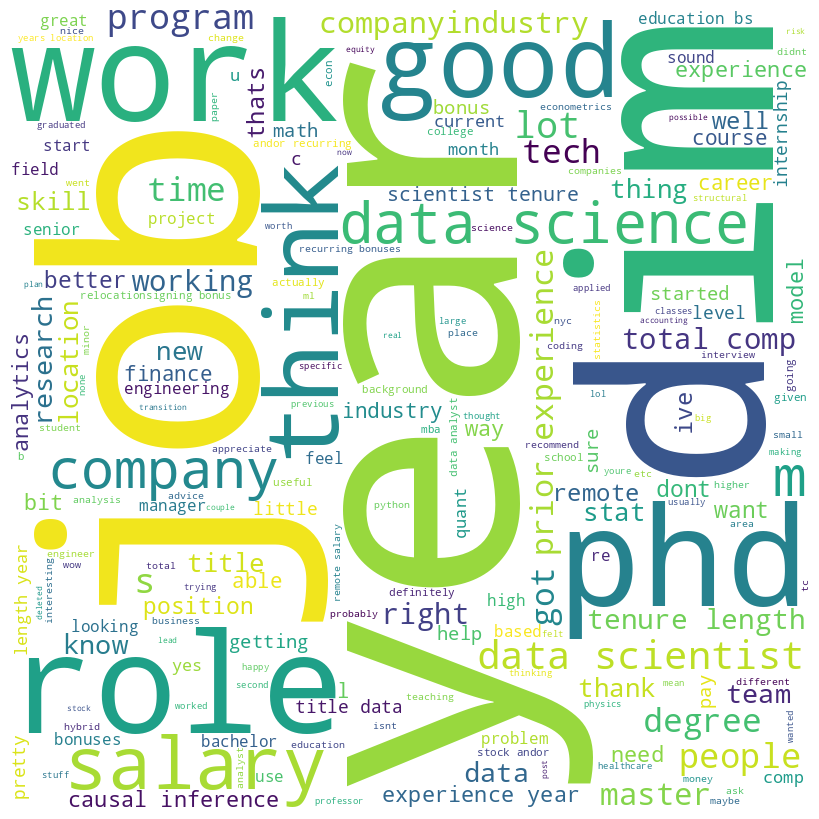

In [141]:
# Python program to generate WordCloud

# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in lst4:

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 5).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**Tokenize text**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


title::27
data:118
scientist:31
tenure:25
length::23
month:4
location::28
ca:1
(hybrid):2
salary::29
k:95
companyindustry::25
government:2
research:17
education::27
bs:23
ms:22
physical:1
sciences:1
prior:30
experience::28
internships:4
(only:1
science:38
related):2
college,:1
post:5
grad:12
internship:8
current:13
company:31
(not:1
relocationsigning:12
bonus::19
signing:3
relocation:5
total:37
comp::24
director:4
year:36
nyc:6
large:8
public:3
finance:11
holding:1
math:11
&:10
analytics:16
years:68
ds,:5
analyst:16
bonuses::20
salary:17
equity:6
yearly,:2
bonus:7
annually:1
senior:10
scientist::1
yrs:3
bay:1
area:5
remote:13
medium:2
mechanical:1
engineering:13
dsml:1
professional:3
stock:20
andor:12
recurring:12
pittsburgh:1
(remote):6
,:17
supply:1
chain:1
software:10
engineer:10
service:2
specialist:2
months:8
usa:3
remote::6
hybrid:4
danhar:1
high:10
school:13
medical:3
field:4
internship::1
none:7
coop::1
lcol:3
hybrid,:3
fully:7
wanted:8
insurance:5
finance,:3
graduating:4
sprin

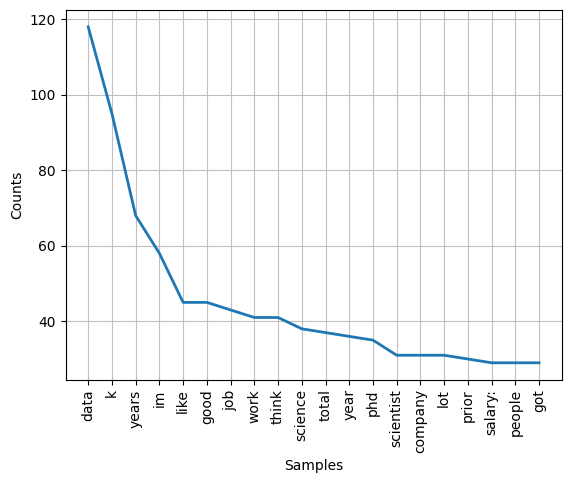

<Axes: xlabel='Samples', ylabel='Counts'>

In [142]:
tokens = [t for t in comment_words.split()]
from nltk.corpus import stopwords
nltk.download('stopwords')
sr = stopwords.words('english')
clean_tokens = tokens[:]

for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)

for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

**Sentiment Analysis**

In [143]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for i in lst4:
  pol_score = sia.polarity_scores(i)
  pol_score['title'] = i
  results.append(pol_score)

In [144]:
results

[{'neg': 0.0,
  'neu': 0.918,
  'pos': 0.082,
  'compound': 0.5423,
  'title': 'title: data scientist tenure length:  month location: ca (hybrid) salary: k companyindustry: government research education: bs  ms physical sciences prior experience:  internships (only  data science related) college,  post grad internship current company (not data related) relocationsigning bonus: k signing  relocation total comp: k'},
 {'neg': 0.0,
  'neu': 0.831,
  'pos': 0.169,
  'compound': 0.7964,
  'title': 'title: data science director tenure length:  year location: nyc salary: k companyindustry: large public finance holding company education: bs math & ms data analytics prior experience:  years ds,  years analyst other bonuses:  salary equity yearly,  bonus annually total comp: k'},
 {'neg': 0.0,
  'neu': 0.814,
  'pos': 0.186,
  'compound': 0.7964,
  'title': 'senior data scientist: tenure length:  yrs location: bay area  remote salary: k companyindustry: medium d company education: ms mechanical 

In [145]:
import pandas as pd
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,title
0,0.000,0.918,0.082,0.5423,title: data scientist tenure length: month lo...
1,0.000,0.831,0.169,0.7964,title: data science director tenure length: y...
2,0.000,0.814,0.186,0.7964,senior data scientist: tenure length: yrs loc...
3,0.000,0.727,0.273,0.8885,title: senior data scientist tenure length: ...
4,0.078,0.823,0.099,0.1901,title: service specialist tenure length: mon...


In [146]:
df['label'] = "neutral"
df.loc[df['compound'] > 0.2, 'label'] = "positive"
df.loc[df['compound'] < -0.2, 'label'] = "negative"
df.tail(50)

,neg,neu,pos,compound,title,label
305,0.000,0.762,0.238,0.3612,can recommend booksresources? (for causal infe...,positive
306,0.026,0.759,0.215,0.8481,structural estimation macrofinancial models li...,positive
307,0.088,0.691,0.221,0.9041,"there many. do quick search ""cmc statisitician...",positive
308,0.000,0.747,0.253,0.8316,"my teams objectivesresponsibilities, need effe...",positive
309,0.208,0.519,0.273,0.1280,"left academia well, biggest thing i miss.",neutral
310,0.000,0.653,0.347,0.4927,very useful working group pms product areas.,positive
311,0.112,0.640,0.248,0.4019,"finished hard science phd . if afford it, i th...",positive
312,0.091,0.834,0.075,-0.0987,it hasnt. theres lot benefits phd older. i org...,neutral
313,0.400,0.600,0.000,-0.2500,the biggest downside financial.,negative
314,0.000,1.000,0.000,0.0000,depends definition tier . but phd essentially ...,neutral


In [147]:
fig = px.histogram(df, x="compound", color = "label")
fig.show()